# PANDAS!!!

IS made for working with data sets generally below or around 1 GB in size, but really this limit varies depending on the memory constraints of the device you run it on. A good rule of thumb is have at least five to ten times the amount of memory on the device as your data set. Once the data set starts to exceed the single-digit gigabyte range, it’s generally recommended to use a different library such as Vaex.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (14, 10),})
import json

In [18]:
account_info = pd.DataFrame({
     "name": ["Bob", "Mary", "Mita"],
     "account": [123846, 123972, 347209],
     "balance": [123, 3972, 7209],
})

account_info

,name,account,balance
0,Bob,123846,123
1,Mary,123972,3972
2,Mita,347209,7209


In [3]:
account_info[["name", "balance"]]

,name,balance
0,Bob,123
1,Mary,3972
2,Mita,7209


# The `iloc` method
A DataFrame’s rows can be accessed via the iloc method which uses a list-like syntax.

In [4]:
account_info.iloc[1]

name         Mary
account    123972
balance      3972
Name: 1, dtype: object

In [5]:
account_info.iloc[:, [0, 2]]

,name,balance
0,Bob,123
1,Mary,3972
2,Mita,7209


In [6]:
account_info.iloc[account_info.index % 2 == 1]

,name,account,balance
1,Mary,123972,3972


In [11]:
account_info.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
list(range(0, 3, 1))

[0, 1, 2]

In [16]:
[0, 1, 2]%2

TypeError: unsupported operand type(s) for %: 'list' and 'int'

# The `loc` method

loc is similar to iloc, but it allows you to index into a DataFrame via column names or labels.

In [18]:
account_info.loc[1]

name         Mary
account    123972
balance      3972
Name: 1, dtype: object

In [19]:
account_info.loc[1, "balance"]

3972

# The `.iat` method
get/set numpy array result by index position

In [35]:
account_info.iat[0,0]

'Bob'

# The `.at` method
get/set numpy array result by index label

In [29]:
account_info.at[0,'name']

'Bob'

The `` method

In [3]:
import io
data = io.StringIO(
     """
     id,age,height,weight
     129237,32,5.4,126
     123083,20,6.1,145
     """
)

pd.read_csv(data)

,id,age,height,weight
0,129237,32,5.4,126
1,123083,20,6.1,145


In [23]:
pd.read_csv(data, usecols=["height", "age"])

EmptyDataError: No columns to parse from file

In [4]:
data = io.StringIO(
     """
     {
         "columns": ["temp"],
         "index": ["234unf923", "340inf351", "234abe045"],
         "data": [[35.2],[32.5],[33.1]],
    }
    """
)
data

In [5]:
temperatures = pd.read_json(
     data,
     orient="split",
)
temperatures

,temp
234unf923,35.2
340inf351,32.5
234abe045,33.1


In [15]:
data = io.StringIO(
"""
    [
         {"location": "234unf923", "temp": 35.2},
         {"location": "340inf351", "temp": 32.5},
         {"location": "234abe045", "temp": 33.1},
    ]
""" 
)
data

In [9]:
temperatures = pd.read_json(
     data,
     orient="records",
)
temperatures

ValueError: Unexpected character found when decoding array value (1)

In [2]:
np.random.rand(10,3)

array([[4.60815565e-01, 8.98624904e-01, 4.75586982e-01],
       [4.42728718e-01, 7.06784720e-02, 5.92730556e-01],
       [7.54996472e-01, 8.40127064e-01, 4.84082952e-01],
       [6.61280082e-01, 1.93356948e-01, 4.33455661e-01],
       [2.21467338e-01, 8.33738448e-01, 1.64475055e-01],
       [9.59005040e-02, 5.14243323e-02, 6.76901154e-01],
       [3.24942383e-01, 4.03415990e-01, 8.70148423e-01],
       [9.14346868e-01, 5.30124116e-01, 8.68359913e-01],
       [7.27740005e-01, 2.45307308e-01, 6.02304586e-01],
       [1.49314790e-01, 4.29764225e-01, 1.84737501e-04]])

In [2]:
df = pd.DataFrame(np.random.rand(10,3), columns = ['a', 'b', 'c'])
df

,a,b,c
0,0.185216,0.946889,0.724656
1,0.008596,0.587888,0.313214
2,0.169439,0.687640,0.963503
3,0.199462,0.234022,0.789010
4,0.562714,0.770226,0.584448
5,0.050174,0.544252,0.306292
6,0.925915,0.072567,0.964663
7,0.981257,0.478004,0.111601
8,0.802079,0.690791,0.530684
9,0.416418,0.884404,0.533681


In [3]:
df.groupby('a').median()

,b,c
a,,
0.008596,0.587888,0.313214
0.050174,0.544252,0.306292
0.169439,0.687640,0.963503
0.185216,0.946889,0.724656
0.199462,0.234022,0.789010
0.416418,0.884404,0.533681
0.562714,0.770226,0.584448
0.802079,0.690791,0.530684
0.925915,0.072567,0.964663


In [5]:
df.groupby('a').b.pct_change()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: b, dtype: float64

In [6]:
df.axes

[RangeIndex(start=0, stop=10, step=1), Index(['a', 'b', 'c'], dtype='object')]

In [7]:
df.axes[0]

RangeIndex(start=0, stop=10, step=1)

In [8]:
df.axes[1]

Index(['a', 'b', 'c'], dtype='object')

In [6]:
beatles = pd.DataFrame({
    'name':    ['Ringo', 'Paul', 'John', 'George'],
    'surname': ['Starr', 'McCartney', 'Lennon', 'Harrison'],
    'born':    [1940, 1942, 1940, 1942],
    'teacher': ['Martin', 'Epstein','Martin', 'Epstein']
})
beatles

,name,surname,born,teacher
0,Ringo,Starr,1940,Martin
1,Paul,McCartney,1942,Epstein
2,John,Lennon,1940,Martin
3,George,Harrison,1942,Epstein


In [15]:
beatles.groupby('teacher').median()

,born
teacher,
Epstein,1942
Martin,1940


In [11]:
d = {
     u'2012-06-08': 388,
     u'2012-06-09': 388,
     u'2012-06-10': 388,
     u'2012-06-11': 389,
     u'2012-06-12': 389,
     u'2012-06-13': 389,
     u'2012-06-14': 389,
     u'2012-06-15': 389,
     u'2012-06-16': 389,
     u'2012-06-17': 389,
     u'2012-06-18': 390,
     u'2012-06-19': 390,
     u'2012-06-20': 390,
     u'2012-06-21': 390,
     u'2012-06-22': 390,
     u'2012-06-23': 390,
     u'2012-06-24': 390,
     u'2012-06-25': 391,
     u'2012-06-26': 391,
     u'2012-06-27': 391,
     u'2012-06-28': 391,
     u'2012-06-29': 391,
     u'2012-06-30': 391,
     u'2012-07-01': 391,
     u'2012-07-02': 392,
     u'2012-07-03': 392,
     u'2012-07-04': 392,
     u'2012-07-05': 392,
}
s = pd.Series(d, name='DateValue')
s.index

Index(['2012-06-08', '2012-06-09', '2012-06-10', '2012-06-11', '2012-06-12',
       '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-16', '2012-06-17',
       '2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21', '2012-06-22',
       '2012-06-23', '2012-06-24', '2012-06-25', '2012-06-26', '2012-06-27',
       '2012-06-28', '2012-06-29', '2012-06-30', '2012-07-01', '2012-07-02',
       '2012-07-03', '2012-07-04', '2012-07-05'],
      dtype='object')

In [16]:
d = {'col1': [1, 2], 'col2': [3, 4]}
pd.DataFrame(d)

,col1,col2
0,1,3
1,2,4


In [17]:
[i for i in np.random.rand(10)]

[0.3072629514596652,
 0.3171058809062286,
 0.6852554757478011,
 0.2583203582048508,
 0.8546571534014287,
 0.8329652705762046,
 0.4356246107399382,
 0.7875802290457108,
 0.8889498084640549,
 0.8403874546641205]

In [19]:
np.random.rand(10).tolist()

[0.8509911082302798,
 0.27288477612297823,
 0.7913296735080781,
 0.464620761433968,
 0.12986057201036394,
 0.16432863757128846,
 0.35460594726420747,
 0.7612045868450374,
 0.32174815329742057,
 0.5452309694931543]

In [20]:
# numpy.random.uniform(low=0.0, high=1.0, size=None)
np.random.uniform(-1.1,1.1,10).tolist()

[0.6497435188758296,
 0.7129726078221608,
 -0.4223667565408018,
 -0.5216511962738777,
 0.6143743468929523,
 -0.5767812100982493,
 0.8220539183498314,
 -0.8128442029684465,
 0.42733660551951735,
 -0.9029237871486637]

In [64]:
SIZE = 50
df = pd.DataFrame({
    'a':  np.random.uniform(-1.1,1.1, SIZE),
    'b':  np.random.uniform(0,12.1, SIZE),
    'c':  np.random.uniform(-np.pi,np.pi, SIZE),
},pd.date_range(dt.datetime.today(), periods=SIZE, freq='S'))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2020-07-18 10:12:11.276745 to 2020-07-18 10:13:00.276745
Freq: S
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       50 non-null     float64
 1   b       50 non-null     float64
 2   c       50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


In [56]:
SIZE = 50
df = pd.DataFrame({
    'dt': pd.date_range(dt.datetime.today(), periods=SIZE, freq='S'),
    'a':  np.random.uniform(-1.1,1.1, SIZE),
    'b':  np.random.uniform(0,12.1, SIZE),
    'c':  np.random.uniform(-np.pi,np.pi, SIZE),
})
df.set_index('dt', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2020-07-18 20:14:43.551976 to 2020-07-18 20:15:32.551976
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       50 non-null     float64
 1   b       50 non-null     float64
 2   c       50 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


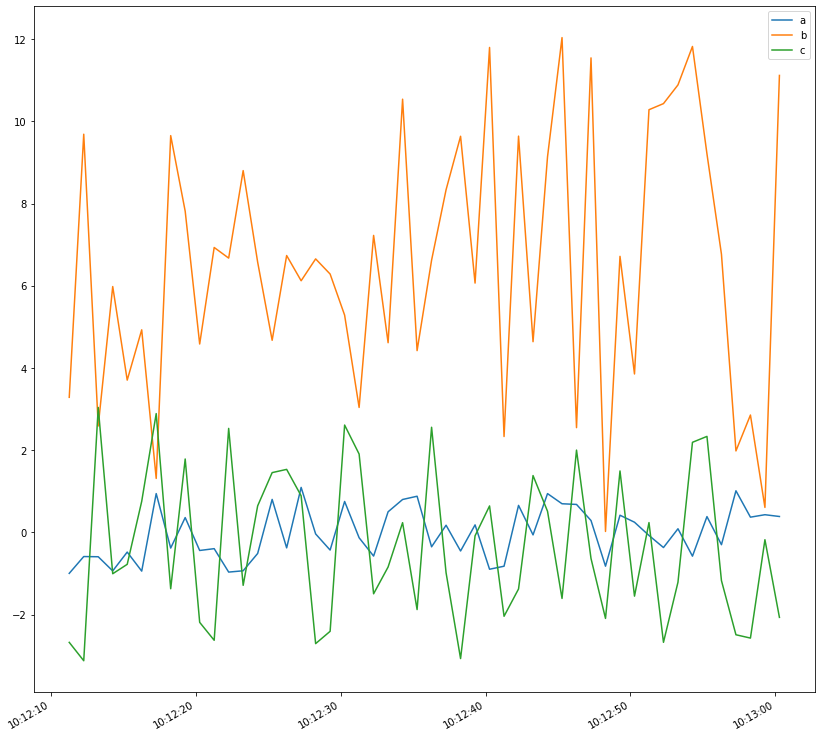

In [65]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (14, 10),})
df.plot()

In [41]:
import datetime as dt
dt.datetime.today()

datetime.datetime(2020, 7, 18, 9, 58, 29, 78170)

In [42]:
dt.datetime.now().strftime("%s")

'1595066315'

In [68]:
dt.datetime.fromtimestamp(1595066315.1000)

datetime.datetime(2020, 7, 18, 9, 58, 35, 100000)

In [46]:
pd.date_range(dt.datetime.today(), periods=100, freq='S')

DatetimeIndex(['2020-07-18 10:00:33.326463', '2020-07-18 10:00:34.326463',
               '2020-07-18 10:00:35.326463', '2020-07-18 10:00:36.326463',
               '2020-07-18 10:00:37.326463', '2020-07-18 10:00:38.326463',
               '2020-07-18 10:00:39.326463', '2020-07-18 10:00:40.326463',
               '2020-07-18 10:00:41.326463', '2020-07-18 10:00:42.326463',
               '2020-07-18 10:00:43.326463', '2020-07-18 10:00:44.326463',
               '2020-07-18 10:00:45.326463', '2020-07-18 10:00:46.326463',
               '2020-07-18 10:00:47.326463', '2020-07-18 10:00:48.326463',
               '2020-07-18 10:00:49.326463', '2020-07-18 10:00:50.326463',
               '2020-07-18 10:00:51.326463', '2020-07-18 10:00:52.326463',
               '2020-07-18 10:00:53.326463', '2020-07-18 10:00:54.326463',
               '2020-07-18 10:00:55.326463', '2020-07-18 10:00:56.326463',
               '2020-07-18 10:00:57.326463', '2020-07-18 10:00:58.326463',
               '2020-07-1

In [71]:
df = pd.read_json("https://raw.githubusercontent.com/domoritz/maps/master/data/iris.json")
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [73]:
df.groupby('species').sum()

,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [53]:
s = pd.Series(data=np.arange(3))
pd.DataFrame(s,['A', 'B', 'C'])

,0
A,NaN
B,NaN
C,NaN


In [25]:
portNames = df.groupby('portName').sum().index.to_list()

port_io = pd.DataFrame(df[(df['portName'] == portNames[0]) & (df.metricId == 854)]['current'].to_list()[0], columns=['x'])
port_io['time'] = port_io['x'].apply(lambda x: dt.datetime.fromtimestamp(x/1e3))
port_io.set_index('time', inplace=True)
port_io.drop(columns=['x'], inplace=True)

for portName in portNames:
    port_io[portName] = pd.DataFrame(df[(df['portName'] == portName) & (df.metricId == 854)]['current'].to_list()[0], columns=['y'])

In [35]:
portName = portNames[1]
portName

'0001'

In [1]:
import json
import requests
adr = 'https://dl.boxcloud.com/d/1/b1!M2krUimm8uPjg85XvBvHFKCQBa81J-Wftp8SnWgisAZJaQbZ0bFPTiE1eSyq0EqgJrJKXGIse4cvOP6RqmlRRJ9axbiO6w_nwKR1kmpzKUh99rmcS279QamNnVKe7YIvXYikhKdoUrLJJhmsb13qYoGzojIsmx3CphX69aveaP6NGMK25nibgKJZqnMmc4sxWV9yBDm7QgUiyrD4jFXZHG2nioUiqdT6fOvnX96ra7-o-07vAsfVRqtWYKdGpajdMiCarpqVUIDvruWRo1rDF2AD7C4DLQx858c0mIRiRWiJxWI-cfsbwE6-Tcgx4AKaJC-82Ytb-oEUWgT3rc11Otz-AinMGf_5uSVT4061ad6d1sAzaYZYu7BwKE1ljq_mOtUQ189t1r3e17F2-GBkCxoZRwfVZw4_-gsLPp6DCz99Mw8JpliV0S7CAYJmlbKin5k8ebblUMToYmv_IDiCkqCSoKY5Rs-f_QhpvQcEMZ6LinVipUsWMlMVNWATLCqW6kZNdZED0IhCcOTBsmJe74gkTkLUB-atHtjrCnG27Dh0GpPHt5Sn2w3FGmhajNZorJ4bQycLJQSuZUQWV6BcnsCGdhOiMlQ0_u0IOstOLBItz_HaJTvQ4rsMknHe0OIXM3EMtLddhF_zNA3yHDNWYxZMpGPd9LHq1_HQijQimyhfXLXUier1Vn-ta5Bf5ZxC9r5bfKBTbPczHnKlz2-va7_lLbu0g488uamFy47HPDK2sRNkf5LVEE2i8yQOw5Whbd3holerzjit3IiiKJg1qFlbQrjY1DgEh01TFbe5R7VNrvE17p4UWxV7siBdutdgegV_kj2El3m9hhjk6khABX-TYBKmMrzDIhQCiuuQZsfXUElypZy6qDMIvO0WdREoFZSiwf-wObNUAaLxbuxnHhye7Z_VSreyKGJ6th1-h0bnB5CwCkk04tx8v2vbqmVXMfbkmVL1zfIspubu73BSw-bsmmZy-nBWN2D7INhTwjbeuhYgd57GTiADvJmqEUfj74mbNTj9Ww173Rnhp8V5Y7Nxy-eSE0z_jQerOMf6479XKaGuHjkQW9XfrvLmg-_WMP075HYZh1QNLR5K2eabN3f5OrUcnXoptZNj_1e-ywzWCN_qDX-MvSnDoC4POfppZKKsUbvlq2L4xKLFgtqhNUr4TngUoBZOKEE6kCeLNUgnm9PLKeOpc8_iatlj58xxC0SdnGBXNo6ezssZ_AmAJnIQxBg763_kmH2zZW8_fEuqVW5QqvNRzjhJaItTUtN0-HPSvGb3yXJ-PDLIelNnN792SRz_pG8-qdJrlgnnGACt5xYGyZvCRiDfVX7EBYravt_EPeG0jtXJO4EJyBM6SZwPpr8sRSUuAdJJCDW9pDoipoz_SBSm7NZ2mHiZ-hAT2VgSzg9PL0hbRtkxwkfZiVsug6N1bTW8KIf6Z8jPFCQCwg../download'
r = requests.get(adr)
r

<Response [200]>

In [ ]:
with open('data.json', 'w') as outfile:
    json.dump(r.json(), outfile)

In [5]:
!curl -O $adr -o "data.json"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.4M  100 36.4M    0     0  20.1M      0  0:00:01  0:00:01 --:--:-- 20.1M


In [55]:
import io
data = io.StringIO(
    """
    Country,Ranking,,Economy,US dollars,
    USA,1,,United States," 21,427,700 ",
    CHN,2,,China," 14,342,903 ",
    JPN,3,,Japan," 5,081,770 ",
    DEU,4,,Germany," 3,845,630 ",
    IND,5,,India," 2,875,142 ",
    GBR,6,,United Kingdom," 2,827,113 ",
    FRA,7,,France," 2,715,518 ",
    ITA,8,,Italy," 2,001,244 ",
    BRA,9,,Brazil," 1,839,758 ",
    CAN,10,,Canada," 1,736,426 ",
    RUS,11,,Russian Federation," 1,699,877 ",a
    KOR,12,,"Korea, Rep."," 1,642,383 ",
    ESP,13,,Spain," 1,394,116 ",
    AUS,14,,Australia," 1,392,681 ",
    MEX,15,,Mexico," 1,258,287 ",
    IDN,16,,Indonesia," 1,119,191 ",
    NLD,17,,Netherlands," 909,070 ",
    SAU,18,,Saudi Arabia," 792,967 ",
    TUR,19,,Turkey," 754,412 ",
    CHE,20,,Switzerland," 703,082 ",
    POL,21,,Poland," 592,164 ",
    THA,22,,Thailand," 543,650 ",
    SWE,23,,Sweden," 530,833 ",
    BEL,24,,Belgium," 529,607 ",
    ARG,25,,Argentina," 449,663 ",b
    NGA,26,,Nigeria," 448,120 ",
    AUT,27,,Austria," 446,315 ",
    IRN,28,,"Iran, Islamic Rep."," 445,345 ",
    ARE,29,,United Arab Emirates," 421,142 ",
    NOR,30,,Norway," 403,336 ",
    ISR,31,,Israel," 395,099 ",
    IRL,32,,Ireland," 388,699 ",
    PHL,33,,Philippines," 376,796 ",
    SGP,34,,Singapore," 372,063 ",
    HKG,35,,"Hong Kong SAR, China"," 366,030 ",
    MYS,36,,Malaysia," 364,702 ",
    ZAF,37,,South Africa," 351,432 ",
    DNK,38,,Denmark," 348,078 ",
    COL,39,,Colombia," 323,803 ",
    EGY,40,,"Egypt, Arab Rep."," 303,175 ",
    BGD,41,,Bangladesh," 302,571 ",
    CHL,42,,Chile," 282,318 ",
    PAK,43,,Pakistan," 278,222 ",
    FIN,44,,Finland," 268,761 ",
    VNM,45,,Vietnam," 261,921 ",
    ROU,46,,Romania," 250,077 ",
    CZE,47,,Czech Republic," 246,489 ",
    PRT,48,,Portugal," 237,686 ",
    IRQ,49,,Iraq," 234,094 ",
    PER,50,,Peru," 226,848 ",
    GRC,51,,Greece," 209,853 ",
    NZL,52,,New Zealand," 206,929 ",
    QAT,53,,Qatar," 183,466 ",
    KAZ,54,,Kazakhstan," 180,162 ",
    DZA,55,,Algeria," 169,988 ",
    HUN,56,,Hungary," 160,967 ",
    UKR,57,,Ukraine," 153,781 ",a
    KWT,58,,Kuwait," 134,761 ",
    MAR,59,,Morocco," 118,725 ",c
    ECU,60,,Ecuador," 107,436 ",
    SVK,61,,Slovak Republic," 105,422 ",
    PRI,62,,Puerto Rico," 104,989 ",
    CUB,63,,Cuba," 100,023 ",
    ETH,64,,Ethiopia," 96,108 ",
    KEN,65,,Kenya," 95,503 ",
    AGO,66,,Angola," 94,635 ",
    DOM,67,,Dominican Republic," 88,941 ",
    LKA,68,,Sri Lanka," 84,009 ",
    OMN,69,,Oman," 76,983 ",
    GTM,70,,Guatemala," 76,710 ",
    MMR,71,,Myanmar," 76,086 ",
    LUX,72,,Luxembourg," 71,105 ",
    BGR,73,,Bulgaria," 67,927 ",
    GHA,74,,Ghana," 66,984 ",
    PAN,75,,Panama," 66,801 ",
    TZA,76,,Tanzania," 63,177 ",d
    BLR,77,,Belarus," 63,080 ",
    CRI,78,,Costa Rica," 61,774 ",
    HRV,79,,Croatia," 60,416 ",
    CIV,80,,CÙte d'Ivoire," 58,792 ",
    UZB,81,,Uzbekistan," 57,921 ",
    URY,82,,Uruguay," 56,046 ",
    LTU,83,,Lithuania," 54,219 ",
    MAC,84,,"Macao SAR, China"," 53,859 ",
    SVN,85,,Slovenia," 53,742 ",
    LBN,86,,Lebanon," 53,367 ",
    LBY,87,,Libya," 52,076 ",
    SRB,88,,Serbia," 51,409 ",
    AZE,89,,Azerbaijan," 48,048 ",
    COD,90,,"Congo, Dem. Rep."," 47,320 ",
    JOR,91,,Jordan," 43,744 ",
    BOL,92,,Bolivia," 40,895 ",
    TKM,93,,Turkmenistan," 40,761 ",
    TUN,94,,Tunisia," 38,798 ",
    CMR,95,,Cameroon," 38,760 ",
    BHR,96,,Bahrain," 38,574 ",
    PRY,97,,Paraguay," 38,145 ",
    UGA,98,,Uganda," 34,387 ",
    LVA,99,,Latvia," 34,117 ",
    EST,100,,Estonia," 31,387 ",
    NPL,101,,Nepal," 30,641 ",
    YEM,102,,"Yemen, Rep."," 27,591 ",
    KHM,103,,Cambodia," 27,089 ",
    SLV,104,,El Salvador," 27,023 ",
    HND,105,,Honduras," 25,095 ",
    PNG,106,,Papua New Guinea," 24,970 ",
    CYP,107,,Cyprus," 24,565 ",e
    ISL,108,,Iceland," 24,188 ",
    TTO,109,,Trinidad and Tobago," 24,100 ",
    SEN,110,,Senegal," 23,578 ",
    ZMB,111,,Zambia," 23,065 ",
    ZWE,112,,Zimbabwe," 21,441 ",
    BIH,113,,Bosnia and Herzegovina," 20,048 ",
    AFG,114,,Afghanistan," 19,101 ",
    SDN,115,,Sudan," 18,902 ",
    BWA,116,,Botswana," 18,341 ",
    LAO,117,,Lao PDR," 18,174 ",
    GEO,118,,Georgia," 17,743 ",f
    MLI,119,,Mali," 17,510 ",
    GAB,120,,Gabon," 16,658 ",
    JAM,121,,Jamaica," 16,458 ",
    BFA,122,,Burkina Faso," 15,746 ",
    ALB,123,,Albania," 15,278 ",
    MOZ,124,,Mozambique," 14,934 ",
    MLT,125,,Malta," 14,786 ",
    PSE,126,,West Bank and Gaza," 14,616 ",
    BEN,127,,Benin," 14,391 ",
    MUS,128,,Mauritius," 14,180 ",
    MDG,129,,Madagascar," 14,084 ",
    MNG,130,,Mongolia," 13,853 ",
    ARM,131,,Armenia," 13,673 ",
    GIN,132,,Guinea," 13,590 ",
    BRN,133,,Brunei Darussalam," 13,469 ",
    NER,134,,Niger," 12,928 ",
    BHS,135,,"Bahamas, The"," 12,827 ",
    MKD,136,,North Macedonia," 12,695 ",
    NIC,137,,Nicaragua," 12,521 ",
    NAM,138,,Namibia," 12,367 ",
    MDA,139,,Moldova," 11,955 ",g
    TCD,140,,Chad," 11,315 ",
    GNQ,141,,Equatorial Guinea," 11,027 ",
    COG,142,,"Congo, Rep."," 10,821 ",
    RWA,143,,Rwanda," 10,122 ",
    HTI,144,,Haiti," 8,499 ",
    KGZ,145,,Kyrgyz Republic," 8,455 ",
    TJK,146,,Tajikistan," 8,117 ",
    XKX,147,,Kosovo," 7,926 ",
    MWI,148,,Malawi," 7,667 ",
    MRT,149,,Mauritania," 7,594 ",
    MCO,150,,Monaco," 7,188 ",
    IMN,151,,Isle of Man," 6,771 ",
    LIE,152,,Liechtenstein," 6,553 ",
    GUM,153,,Guam," 5,920 ",
    MDV,154,,Maldives," 5,729 ",
    FJI,155,,Fiji," 5,536 ",
    MNE,156,,Montenegro," 5,495 ",
    CYM,157,,Cayman Islands," 5,485 ",
    TGO,158,,Togo," 5,460 ",
    BRB,159,,Barbados," 5,209 ",
    SWZ,160,,Eswatini," 4,405 ",
    GUY,161,,Guyana," 4,280 ",
    SUR,162,,Suriname," 3,985 ",
    SLE,163,,Sierra Leone," 3,941 ",
    VIR,164,,Virgin Islands (U.S.)," 3,855 ",
    DJI,165,,Djibouti," 3,319 ",
    AND,166,,Andorra," 3,154 ",
    CUW,167,,CuraÁao," 3,128 ",
    LBR,168,,Liberia," 3,071 ",
    ABW,169,,Aruba," 3,056 ",
    GRL,170,,Greenland," 3,052 ",
    BDI,171,,Burundi," 3,012 ",
    FRO,172,,Faroe Islands," 2,833 ",
    LSO,173,,Lesotho," 2,460 ",
    BTN,174,,Bhutan," 2,447 ",
    CAF,175,,Central African Republic," 2,220 ",
    LCA,176,,St. Lucia," 2,122 ",
    CPV,177,,Cabo Verde," 1,982 ",
    BLZ,178,,Belize," 1,880 ",
    GMB,179,,"Gambia, The"," 1,764 ",
    ATG,180,,Antigua and Barbuda," 1,728 ",
    SYC,181,,Seychelles," 1,699 ",
    TLS,182,,Timor-Leste," 1,674 ",
    SMR,183,,San Marino," 1,638 ",
    SLB,184,,Solomon Islands," 1,425 ",
    GNB,185,,Guinea-Bissau," 1,340 ",
    MNP,186,,Northern Mariana Islands," 1,323 ",
    GRD,187,,Grenada," 1,228 ",
    COM,188,,Comoros," 1,186 ",
    KNA,189,,St. Kitts and Nevis," 1,051 ",
    TCA,190,,Turks and Caicos Islands," 1,022 ",
    VUT,191,,Vanuatu, 917 ,
    WSM,192,,Samoa, 851 ,
    VCT,193,,St. Vincent and the Grenadines, 825 ,
    ASM,194,,American Samoa, 636 ,
    DMA,195,,Dominica, 596 ,
    TON,196,,Tonga, 450 ,
    STP,197,,S„o TomÈ and Principe, 429 ,
    FSM,198,,"Micronesia, Fed. Sts.", 402 ,
    PLW,199,,Palau, 284 ,
    MHL,200,,Marshall Islands, 221 ,
    KIR,201,,Kiribati, 195 ,
    NRU,202,,Nauru, 118 ,
    TUV,203,,Tuvalu, 47 ,
    """
)
data
gdp = pd.read_csv(data, index_col='Ranking', usecols=[0,1,3,4])

In [57]:
gdp.head(50)

,Country,Economy,US dollars
Ranking,,,
1,USA,United States,"21,427,700"
2,CHN,China,"14,342,903"
3,JPN,Japan,"5,081,770"
4,DEU,Germany,"3,845,630"
5,IND,India,"2,875,142"
6,GBR,United Kingdom,"2,827,113"
7,FRA,France,"2,715,518"
8,ITA,Italy,"2,001,244"
9,BRA,Brazil,"1,839,758"


In [61]:
gdp.columns

Index(['    Country', 'Economy', 'US dollars'], dtype='object')

In [66]:
gdp.rename(columns={'    Country': 'Country', 'US dollars': 'Nominal' }, inplace=True)

In [70]:
gdp[gdp['Country'] == 'CZE']

,Country,Economy,Nominal
Ranking,,,


# `applymap`

In [96]:
str.strip

<method 'strip' of 'str' objects>

In [100]:
gdp = gdp.applymap(str.strip)

In [137]:
gdp.Country[1]

'USA'

In [123]:
gdp.Nominal[1] = gdp.Nominal[1].replace(',','')

In [131]:
gdp['Nominal'] = gdp['Nominal'].str.replace(',','')

In [133]:
gdp.Nominal[3]

'5081770'

In [110]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
locale.atoi(gdp.Nominal[1])

Error: unsupported locale setting

# Convert number strings with commas in pandas DataFrame

In [84]:
gdp.dtypes

Country    object
Economy    object
Nominal    object
dtype: object

In [134]:
gdp['Nominal'] = gdp['Nominal'].astype(int)

In [135]:
gdp.dtypes

Country    object
Economy    object
Nominal     int64
dtype: object

In [86]:
pd.to_numeric(gdp['Nominal'])

ValueError: Unable to parse string " 21,427,700 " at position 0

In [91]:
import locale

locale.setlocale(locale.LC_NUMERIC, '')
pd.to_numeric(gdp['Nominal'])

ValueError: Unable to parse string " 21,427,700 " at position 0

In [78]:
gdp.at[47,'Country'].strip()

'CZE'

In [80]:
gdp.at[47,'Economy']

'Czech Republic'

In [82]:
type(gdp.at[47,'Nominal'])

str

In [139]:
gdp[gdp.Country == 'CZE']

,Country,Economy,Nominal
Ranking,,,
47,CZE,Czech Republic,246489


In [142]:
gdp.head(25)

,Country,Economy,Nominal
Ranking,,,
1,USA,United States,21427700
2,CHN,China,14342903
3,JPN,Japan,5081770
4,DEU,Germany,3845630
5,IND,India,2875142
6,GBR,United Kingdom,2827113
7,FRA,France,2715518
8,ITA,Italy,2001244
9,BRA,Brazil,1839758


In [153]:
gdp[['Country','Nominal']].head(50)

,Country,Nominal
Ranking,,
1,USA,21427700
2,CHN,14342903
3,JPN,5081770
4,DEU,3845630
5,IND,2875142
6,GBR,2827113
7,FRA,2715518
8,ITA,2001244
9,BRA,1839758


In [157]:
gdp['Country'][1]

'USA'

In [158]:
gdp.loc[1]

Country              USA
Economy    United States
Nominal         21427700
Name: 1, dtype: object

In [159]:
gdp.loc[1,'Country']

'USA'

In [162]:
gdp.iloc[0,0]

'USA'

In [164]:
gdp.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            194, 195, 196, 197, 198, 199, 200, 201, 202, 203],
           dtype='int64', name='Ranking', length=203)

In [169]:
for i in gdp.index:
    print(gdp.Country[i], end=', ')

USA, CHN, JPN, DEU, IND, GBR, FRA, ITA, BRA, CAN, RUS, KOR, ESP, AUS, MEX, IDN, NLD, SAU, TUR, CHE, POL, THA, SWE, BEL, ARG, NGA, AUT, IRN, ARE, NOR, ISR, IRL, PHL, SGP, HKG, MYS, ZAF, DNK, COL, EGY, BGD, CHL, PAK, FIN, VNM, ROU, CZE, PRT, IRQ, PER, GRC, NZL, QAT, KAZ, DZA, HUN, UKR, KWT, MAR, ECU, SVK, PRI, CUB, ETH, KEN, AGO, DOM, LKA, OMN, GTM, MMR, LUX, BGR, GHA, PAN, TZA, BLR, CRI, HRV, CIV, UZB, URY, LTU, MAC, SVN, LBN, LBY, SRB, AZE, COD, JOR, BOL, TKM, TUN, CMR, BHR, PRY, UGA, LVA, EST, NPL, YEM, KHM, SLV, HND, PNG, CYP, ISL, TTO, SEN, ZMB, ZWE, BIH, AFG, SDN, BWA, LAO, GEO, MLI, GAB, JAM, BFA, ALB, MOZ, MLT, PSE, BEN, MUS, MDG, MNG, ARM, GIN, BRN, NER, BHS, MKD, NIC, NAM, MDA, TCD, GNQ, COG, RWA, HTI, KGZ, TJK, XKX, MWI, MRT, MCO, IMN, LIE, GUM, MDV, FJI, MNE, CYM, TGO, BRB, SWZ, GUY, SUR, SLE, VIR, DJI, AND, CUW, LBR, ABW, GRL, BDI, FRO, LSO, BTN, CAF, LCA, CPV, BLZ, GMB, ATG, SYC, TLS, SMR, SLB, GNB, MNP, GRD, COM, KNA, TCA, VUT, WSM, VCT, ASM, DMA, TON, STP, FSM, PLW, MHL, 

In [170]:
mtcars = pd.DataFrame({
           'mpg':[21,21,22.8,21.4,18.7,18.1,18.3,24.4,22.8,19.2],
           'cyl':[6,6,4,6,8,6,8,4,4,4],
           'disp':[160,160,108,258,360,225,360,146.7,140.8,167.7],
           'hp':[110,110,93,110,175,105,245,62,95,123],
           'category':['SUV','Sedan','Sedan','Hatchback','SUV','Sedan','SUV','Hatchback','SUV','Sedan']
}) 
mtcars

,mpg,cyl,disp,hp,category
0,21.0,6,160.0,110,SUV
1,21.0,6,160.0,110,Sedan
2,22.8,4,108.0,93,Sedan
3,21.4,6,258.0,110,Hatchback
4,18.7,8,360.0,175,SUV
5,18.1,6,225.0,105,Sedan
6,18.3,8,360.0,245,SUV
7,24.4,4,146.7,62,Hatchback
8,22.8,4,140.8,95,SUV
9,19.2,4,167.7,123,Sedan


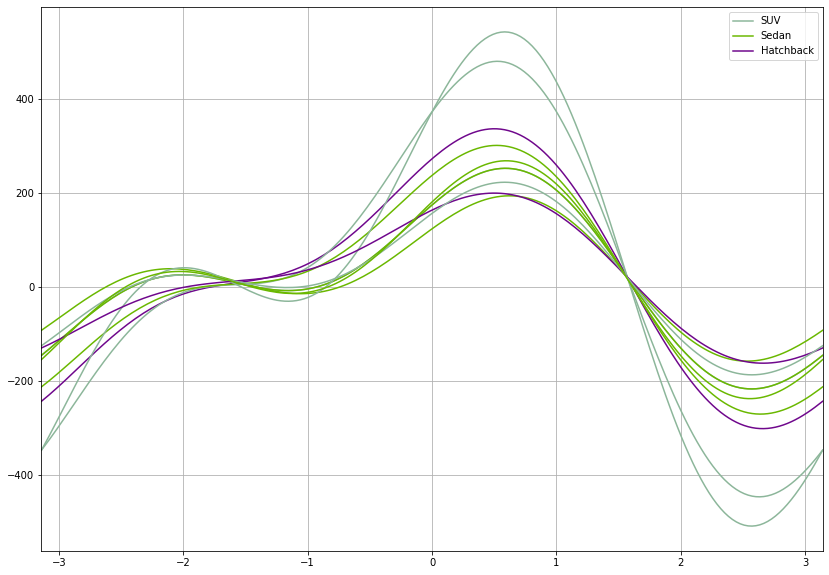

In [172]:
pd.plotting.andrews_curves(mtcars,'category')

# Boolean indexing
Another common operation is the use of boolean vectors to filter the data.
The operators are:


| pd    | bool   |
| :---- | :----: |
| \|    | or     |
| &     | and    |
| ~     | not    | 




In [2]:
from pandas_datareader import wb


ModuleNotFoundError: No module named 'pandas_datareader'

In [3]:
df = pd.DataFrame(
    data={
        'ports': [
            ['I0232', 'I0302'],
            ['I0232', 'I0302', 'I0232', 'I0302'],
            ['I0232', 'I0302'],
            ['I0232', 'I0302'],
            ['I0232', 'I0302', 'I0232', 'I0302'],
            ['I0232', 'I0302', 'I0232', 'I0302'],
            ['I0232', 'I0302'],
        ]
    }
)
df

,ports
0,"[I0232, I0302]"
1,"[I0232, I0302, I0232, I0302]"
2,"[I0232, I0302]"
3,"[I0232, I0302]"
4,"[I0232, I0302, I0232, I0302]"
5,"[I0232, I0302, I0232, I0302]"
6,"[I0232, I0302]"


In [5]:
df.index

RangeIndex(start=0, stop=7, step=1)

In [6]:
df.columns

Index(['ports'], dtype='object')

In [9]:
df = pd.DataFrame(df.ports.tolist(),  columns=['io0', 'io1', 'io2', 'io3' ])

In [10]:
df.columns.tolist()

['io0', 'io1', 'io2', 'io3']

In [11]:
df['io0'] = df['io0'].str.lstrip('I')

In [12]:
df

,io0,io1,io2,io3
0,0232,I0302,None,None
1,0232,I0302,I0232,I0302
2,0232,I0302,None,None
3,0232,I0302,None,None
4,0232,I0302,I0232,I0302
5,0232,I0302,I0232,I0302
6,0232,I0302,None,None


In [13]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.254682,-0.753485,0.291200,0.211419
2013-01-02,0.560779,-0.181345,1.390363,0.434177
2013-01-03,-0.934347,0.281599,-0.984563,0.100037
2013-01-04,1.450703,1.179211,-0.566999,0.957544
2013-01-05,-0.066871,-0.092364,-0.735539,0.216851
2013-01-06,-0.757265,-0.020023,-0.607506,-1.282308


In [20]:
(df > 0).all()

A    False
B    False
C    False
D    False
dtype: bool

In [19]:
(df > 0).any()

A    True
B    True
C    True
D    True
dtype: bool

In [16]:
df.to_numpy()

array([[-0.25468232, -0.75348548,  0.29119966,  0.21141852],
       [ 0.56077931, -0.1813452 ,  1.390363  ,  0.43417723],
       [-0.93434672,  0.28159941, -0.98456286,  0.10003713],
       [ 1.45070296,  1.17921085, -0.56699902,  0.95754402],
       [-0.06687136, -0.09236436, -0.73553889,  0.21685096],
       [-0.75726498, -0.02002255, -0.60750576, -1.28230753]])